In [ ]:
import pandas as pd 
import numpy as np 

datafolder = '/Users/jeffreychen/DatathonData/Datathon Materials/Datasets/'

listing_data = pd.read_csv(datafolder + 'listings.csv')
listingcln = pd.read_csv(datafolder + 'listings_cleaned.csv')
listing_south = pd.read_csv(datafolder +'us_south_listings_multi_label.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jeffreychen/DatathonData/Datathon Materials/Datasets/listings.csv'

In [ ]:
listing_data.metropolitan.unique()

array(['asheville', 'austin', 'nashville', 'new_orleans', 'LA'],
      dtype=object)

In [ ]:
reviews_austin = pd.read_csv(datafolder + 'reviews_austin.csv.gz')
reviews_la = pd.read_csv(datafolder + 'reviews_LA.csv.gz')
reviews_ash = pd.read_csv(datafolder + 'reviews_asheville.csv.gz')
reviews_new_orl = pd.read_csv(datafolder + 'reviews_new_orlaeans.csv.gz')

In [ ]:
reviews_la

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...
3,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...
4,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...
...,...,...,...,...,...,...
1058877,48989188,746232860,2021-04-05,337843272,Lito,Amazing stay !
1058878,48989188,746373642,2021-04-06,349511586,Nicholas,Communication on point! Great host! Great plac...
1058879,48995665,745052995,2021-04-03,364739471,Mykelte,Great stay! House already felt like home for u...
1058880,48995725,746636251,2021-04-07,47492777,Sheila,Beautiful location and space! Great host- ver...


In [ ]:
def cln_df(df):
    df['date'] = pd.to_datetime(df['date'])
    df['comments'] = df['comments'].astype(str)
    time_mask = (df['date'] < '2019') & (df['date'] > '2015')
    df = df[time_mask].reset_index(drop=True)
    df = df[['listing_id','date','comments']]
    return df


In [ ]:
reviews_austin = cln_df(reviews_austin)
reviews_la = cln_df(reviews_la)
reviews_ash = cln_df(reviews_ash)
reviews_new_orl = cln_df(reviews_new_orl)

In [ ]:
ttl_reviews = pd.concat([reviews_la, reviews_austin, reviews_ash, reviews_new_orl], axis=0)
ttl_reviews

,listing_id,date,comments
0,109,2016-05-15,Me and two friends stayed for four and a half ...
1,2708,2015-07-25,Staying with Chas was an absolute pleasure. He...
2,2708,2016-02-01,Charles is a most wonderful host. I enjoyed my...
3,2708,2016-03-20,Chas is a really good host. He gives me a lot ...
4,2708,2017-12-29,ﾎｽﾄはとても親切で英語の発音の仕方など丁寧に教えてくれた｡\n\n部屋はﾘﾋﾞﾝｸﾞを板で...
...,...,...,...
140836,30955607,2018-12-30,Vickel offered amazing hospitality and helped ...
140837,30965561,2018-12-28,"Kevin’s home was perfect, felt like we were “h..."
140838,31057020,2018-12-28,Place was amazing and very central to tourism!...
140839,31120119,2018-12-29,Location is amazing and the apartment is great...


In [ ]:
ttl_reviews = ttl_reviews[['listing_id','date','comments']]
ttl_reviews

,listing_id,date,comments
0,109,2016-05-15,Me and two friends stayed for four and a half ...
1,2708,2015-07-25,Staying with Chas was an absolute pleasure. He...
2,2708,2016-02-01,Charles is a most wonderful host. I enjoyed my...
3,2708,2016-03-20,Chas is a really good host. He gives me a lot ...
4,2708,2017-12-29,ﾎｽﾄはとても親切で英語の発音の仕方など丁寧に教えてくれた｡\n\n部屋はﾘﾋﾞﾝｸﾞを板で...
...,...,...,...
140836,30955607,2018-12-30,Vickel offered amazing hospitality and helped ...
140837,30965561,2018-12-28,"Kevin’s home was perfect, felt like we were “h..."
140838,31057020,2018-12-28,Place was amazing and very central to tourism!...
140839,31120119,2018-12-29,Location is amazing and the apartment is great...


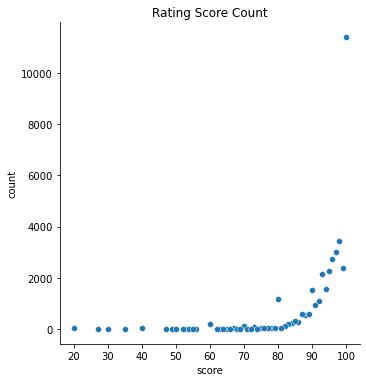

In [ ]:
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt

labels, values = zip(*Counter(listing_data['review_scores_rating']).items())

indexes = np.arange(len(labels))

ax = sns.relplot(x=labels, y=values).set(title='Rating Score Count',\
     ylabel='count',xlabel='score')

ax.savefig('Rating Count.png')

In [ ]:
len(listing_data.loc[listing_data['review_scores_rating'] <= 50])

143

In [ ]:
poorrating = listing_data.loc[listing_data['review_scores_rating'] <= 50].copy().reset_index(drop=True)
poorrating_id = poorrating['id']
ttl_poor_rv = ttl_reviews[ttl_reviews['listing_id'].isin(poorrating_id)].reset_index(drop=True)
ttl_poor_rv

,listing_id,date,comments
0,3264791,2015-06-03,I did not realize this was a dorm room prior t...
1,3655131,2016-07-18,Yes listing as described. He has a very poor c...
2,3655131,2016-09-11,This should not be a listing. The tub is disg...
3,3655131,2017-09-11,The host canceled this reservation 17 days bef...
4,4708239,2015-01-02,The general apartment is very clean (which exp...
5,7032225,2016-04-09,Paul and his wife are really welcoming.
6,7032225,2018-04-20,Good
7,7790855,2015-08-21,"First time for kel , place wasn t clean , the ..."
8,9617789,2015-12-20,I have to say I was not impressed or satisfied...
9,9739269,2016-01-01,"Neighborhood is good, house was cold and there..."


In [ ]:
ttl_poor_rv = ttl_poor_rv.groupby('listing_id')['comments'].apply(lambda x: "%s" % ','.join(x))
ttl_poor_rv = pd.DataFrame(ttl_poor_rv)
ttl_poor_rv.head()

,comments
listing_id,
3264791,I did not realize this was a dorm room prior t...
3655131,Yes listing as described. He has a very poor c...
4708239,The general apartment is very clean (which exp...
7032225,"Paul and his wife are really welcoming.,Good"
7790855,"First time for kel , place wasn t clean , the ..."


In [ ]:
ttl_poor_rv.to_csv('poor_rating_review.csv')

In [ ]:
goodrating = listing_data.loc[listing_data['review_scores_rating'] >= 90].copy().reset_index(drop=True)
goodrt_id = goodrating['id']
good_rv = ttl_reviews[ttl_reviews['listing_id'].isin(goodrt_id)].reset_index(drop=True)
good_rv = good_rv.groupby('listing_id')['comments'].apply(lambda x: "%s" % ','.join(x))
good_rv = pd.DataFrame(good_rv)
good_rv.head()

,comments
listing_id,
2265,Paddy was extremely responsive and accommodati...
2732,I had the most wonderful experience at Louise ...
5245,I had a great time staying with Paddy. She is ...
5456,Pretty apartment that was the perfect location...
5728,Jeg følte mig velkommen fra første sekund og f...


In [ ]:
len(good_rv)

8181

In [ ]:
good_rv.to_csv('good_rating_review.csv')

In [ ]:
# Packages
import nltk
import os
import pandas            as pd
import pysentiment2      as ps
from nltk.tokenize    import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus      import stopwords

nltk.download('punkt')
nltk.download('stopwords')

def create_df(dataset):
    stop_words = set(stopwords.words('english'))
    additional_stopwords = ['say','veri','wa','u','hi','ha','us','would','th','thi','and','also','hous'] 
    positive_words = ['great','locat','highli','recommend','home','enjoy','stay','welcom','nice','stay','well','clean','good','comfort']
    common_words = ['room','bed','downtown','water','place','day']

    stop_words.update(additional_stopwords)
    #stop_words.add(positive_words)
    stop_words.update(common_words)
    lm         = ps.LM()
    #dataset    = dataset.drop(columns=[lables])
    dataset.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

    for col in dataset.columns:
        dataset[col] = dataset[col].str.lower()
        #dataset[col] = dataset[col].str.replace('b ','')
    headlines  = []
    head_clean = []
    sentscore  = []
    porter = PorterStemmer()

    for row in range(len(dataset.index)):
        document = ' '.join(str(x) for x in dataset.iloc[row, 0:25])
        headlines.append(document)
        tokens  =  word_tokenize(document)
        stemmed = [porter.stem(word) for word in tokens]
        words   = [w for w in stemmed if not w in stop_words]
        head_clean.append(' '.join(word for word in words))
        tokens  = lm.tokenize(' '.join(word for word in words))
        sentscore.append(lm.get_score(tokens)['Polarity'])
    df              = pd.DataFrame(headlines, columns=['All'])
    df['processed'] = head_clean
    df['score']     = sentscore
    # data is the dataset after filling NaNs defined out of the function scope
    #df['label'] = dataset.label 
    #df['date']  = dataset.date
    
    entire_processed_text = ' '.join(doc for doc in head_clean)
    #lables.append('ALL','processed','score')
    return df, entire_processed_text

df_poor, poor_txt = create_df(ttl_poor_rv)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jeffreychen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeffreychen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
import os
from sklearn.metrics import mean_squared_error as mse 
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords, PlaintextCorpusReader
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing

s_words = stopwords.words('english')
additional_stopwords = ['say','veri','wa','u','hi','ha','us','would','th','thi','and','also'] 

s_words.extend(additional_stopwords)

def word_frequency(sentence, stopwords):
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in s_words]
    new_tokens = [t for t in new_tokens if t.isalpha()] # stop words and letter check
    lemmatizer = WordNetLemmatizer()
    lemmatizer = [lemmatizer.lemmatize(t) for t in new_tokens]
    counted = Counter(new_tokens)
    counted2 = Counter(ngrams(new_tokens, 2))
    counted3 = Counter(ngrams(new_tokens, 3))
    word_freq = pd.DataFrame(
        counted.items(), 
        columns=['word', 'frequency']).sort_values(by='frequency', ascending = False)
    word_pairs = pd.DataFrame(
        counted2.items(), 
        columns=['word', 'frequency']).sort_values(by='frequency', ascending = False)
    word_trigrams = pd.DataFrame(
        counted3.items(), 
        columns=['word', 'frequency']).sort_values(by='frequency', ascending = False)
    return word_freq, word_pairs, word_trigrams


In [ ]:
positive_words = ['great','locat','highli','recommend','home','enjoy','stay','welcom','nice','stay','well','clean','good','comfort']
common_words = ['room','bed','downtown','water','place','day','new','orlean','austin','la','asheville','hous']
s_words.extend(positive_words)
s_words.extend(common_words)

In [ ]:
frq_pr1, frq_pr2, frq_pr3 =word_frequency(poor_txt, s_words)

In [ ]:
frq_pr1.head(50)

,word,frequency
92,host,12
88,arriv,11
118,time,9
30,cancel,8
94,befor,8
93,reserv,8
69,get,6
96,post,5
95,autom,5
13,towel,5


In [ ]:
frq_pr2.head(20)

,word,frequency
106,"(reserv, befor)",5
105,"(cancel, reserv)",5
108,"(arriv, autom)",5
107,"(befor, arriv)",5
109,"(autom, post)",5
104,"(host, cancel)",5
301,"(last, minut)",3
344,"(experi, host)",2
464,"(phone, call)",2
99,"(upon, arriv)",2


In [ ]:
frq_pr3.head(30)

,word,frequency
104,"(host, cancel, reserv)",5
105,"(cancel, reserv, befor)",5
106,"(reserv, befor, arriv)",5
107,"(befor, arriv, autom)",5
108,"(arriv, autom, post)",5
346,"(experi, host, cancel)",2
366,"(phone, mean, gone)",1
362,"(realli, loudli, wrote)",1
363,"(loudli, wrote, head)",1
364,"(wrote, head, phone)",1


<AxesSubplot:xlabel='frequency', ylabel='word'>

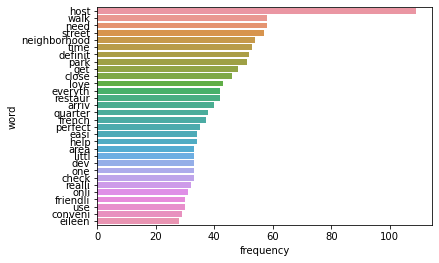

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
ax = plt.figure()
sns.barplot(x='frequency', y='word', data=frq_pr1.head(30))

<AxesSubplot:xlabel='frequency', ylabel='word'>

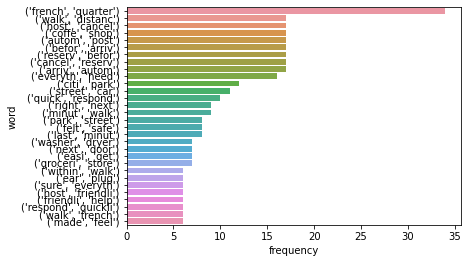

In [ ]:
ax = plt.figure()
sns.barplot(x='frequency', y='word', data=frq_pr2.head(30))

<AxesSubplot:xlabel='frequency', ylabel='word'>

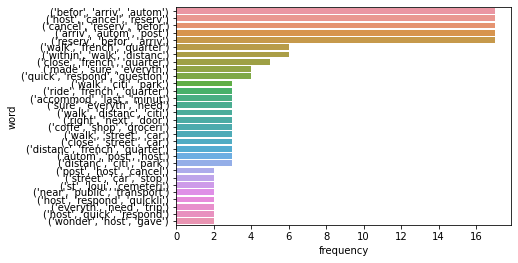

In [ ]:
ax = plt.figure()
sns.barplot(x='frequency', y='word', data=frq_pr3.head(30))

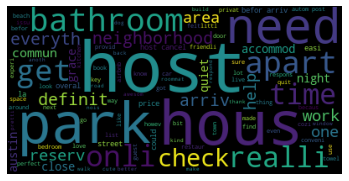

In [ ]:
wc_Tx = WordCloud(max_words=100, stopwords=s_words).generate_from_text(poor_txt)

plt.figure()
plt.imshow(wc_Tx)
plt.axis('off')
plt.show()

In [ ]:
frq_pr1[:50]

,word,frequency
1,host,109
279,walk,58
277,need,58
188,street,57
8,neighborhood,54
16,time,53
6,definit,52
53,park,51
21,get,48
9,close,46


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e6d3dd7-a3ce-422e-8f25-57163d804f84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>